In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn import datasets
%matplotlib inline

In [2]:
iris = datasets.load_iris()

### Оценка матожидания

In [3]:
# num_types количество различных типов ириса
num_types = 3
# vec_size количество характеристик ириса
vec_size = 4

# матрица матожиданий
mean = np.array([])

# подсчет матожиданий
for t in xrange(num_types):
    # first и last - индексы начала и конца данных об ирисах типа t
    first = t * iris.target.size / num_types
    last = (t + 1) * iris.target.size / num_types
    
    a = np.zeros(vec_size)
    for n in xrange(vec_size):
        a[n] = np.mean(iris.data[first:last,n])
    mean = np.append(mean, a)
    
mean = np.reshape(mean, (num_types, vec_size))

In [4]:
# печать матрицы оценки матожиданий
print mean  

[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]


### Оценка матриц ковариации

In [5]:
# матрица матриц ковариации
# первый индекс - тип ириса
# второй и третий - строка и столбец в соответсвующей матрице ковариаций 
var = np.zeros((num_types, vec_size, vec_size))

# подсчет матриц ковариации
for t in xrange(num_types):
    # first и last - индексы начала и конца данных об ирисах типа t
    first = t * iris.target.size / num_types
    last = (t + 1) * iris.target.size / num_types
    
    for n in xrange(vec_size):
        for m in xrange(vec_size):
            # если значение еще не посчитано, то считаем (матрица симметрична)
            if(var[t][n][m] == 0):
                var[t][n][m] = np.mean(iris.data[first:last, n] * iris.data[first:last, m]) - \
                               mean[t, n] * mean[t, m]
                    
                # записываем значение в симметричную позицию
                var[t][m][n] = var[t][n][m]

In [6]:
# печать матрицы матриц ковариаций
print var

[[[ 0.121764  0.098292  0.015816  0.010336]
  [ 0.098292  0.142276  0.011448  0.011208]
  [ 0.015816  0.011448  0.029504  0.005584]
  [ 0.010336  0.011208  0.005584  0.011264]]

 [[ 0.261104  0.08348   0.17924   0.054664]
  [ 0.08348   0.0965    0.081     0.04038 ]
  [ 0.17924   0.081     0.2164    0.07164 ]
  [ 0.054664  0.04038   0.07164   0.038324]]

 [[ 0.396256  0.091888  0.297224  0.048112]
  [ 0.091888  0.101924  0.069952  0.046676]
  [ 0.297224  0.069952  0.298496  0.047848]
  [ 0.048112  0.046676  0.047848  0.073924]]]


## Графики плотностей пар координат (0, 1); (1, 3); (2, 3)

Функция plot_pdf принимает в качестве аргументов: 

dist_mean - матрица матожиданий, 

dist_var - матрица матриц ковариаций, 

num_types - количество типов ириса, 

t - номер типа ириса(0, 1, 2), 

n , m - пара координат, для которых строится график плотности, 

width = 1.5 - "ширина" графика

In [7]:
def plot_pdf(dist_mean, dist_var, num_types, t, n, m, width = 1.5):
    
    # first и last - индексы начала и конца данных об ирисах типа i
    first = t * iris.target.size / num_types
    last = (t + 1) * iris.target.size / num_types
    
    # сетка графика (значения, для которых считаем плотность)
    grid = np.mgrid[(dist_mean[t,n] - width):(dist_mean[t,n] + width):0.02,
                    (dist_mean[t,m] - width):(dist_mean[t,m] + width):0.02]
    
    # плотность в этих точках
    density = np.array([[sts.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), 
                                                     mean=[dist_mean[t, n], dist_mean[t, m]], 
                                                     cov=[[dist_var[t, m, m], dist_var[t, n, m]], 
                                                          [dist_var[t, m, n], dist_var[t, n, n]]])
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[0].shape[1])])
    
    # строим линии уровня
    CS = plt.contour(grid[0], grid[1], density)
    plt.clabel(CS, fontsize=10, inline=1, fmt='%1.3f')
    plt.xlim((np.min(grid[0]), np.max(grid[0])))
    plt.ylim((np.min(grid[1]), np.max(grid[1])))
    
    # проекции точек выборки
    plt.scatter(iris.data[first:last, n], iris.data[first:last, m], alpha=0.7, s=10, label='sample')

### Графики для пары координат (0, 1)

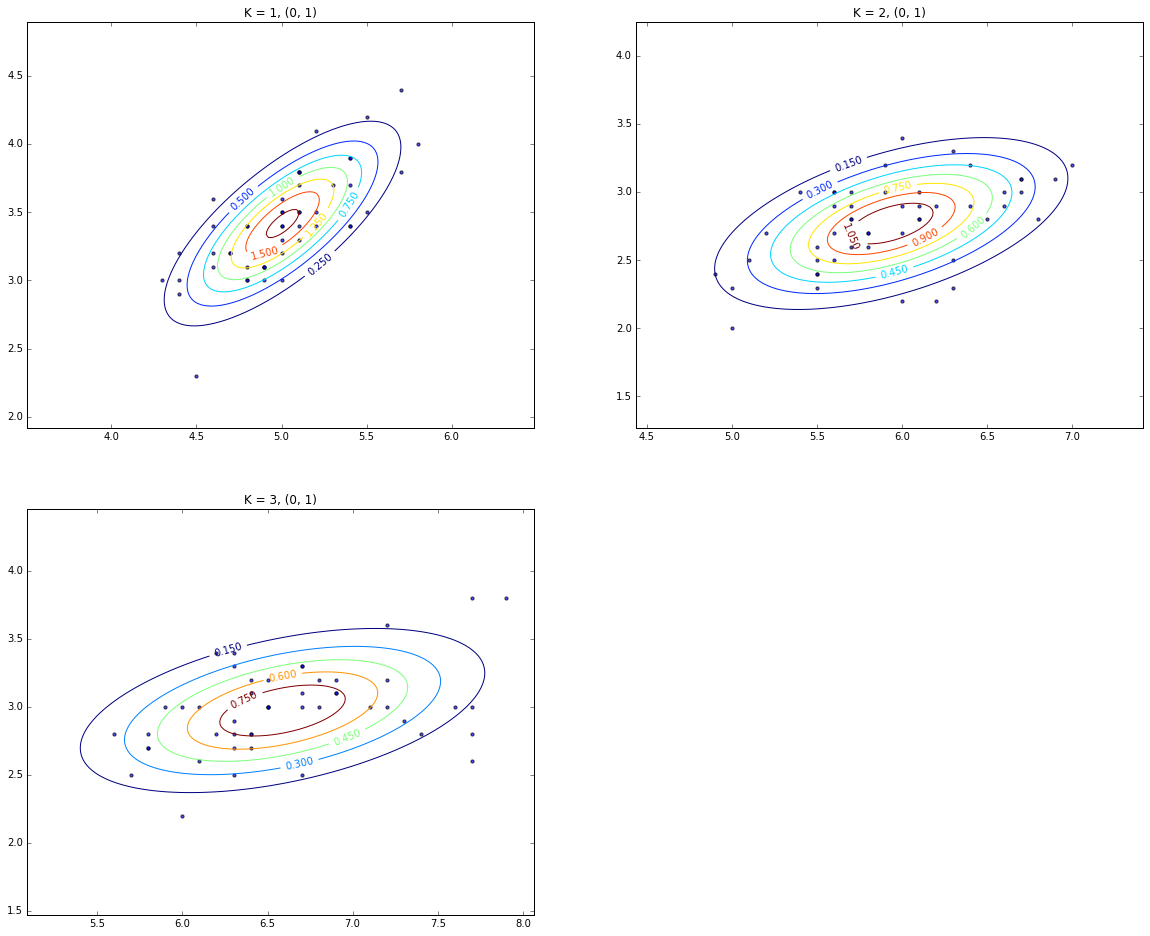

In [8]:
# построение графиков
plt.figure(figsize=(20, 16))

n = 0
m = 1

plt.subplot(2, 2, 1)
plot_pdf(mean, var, num_types, 0, n, m)
plt.title('K = 1, (' + str(n) + ', ' + str(m) + ')')

plt.subplot(2, 2, 2)
plot_pdf(mean, var, num_types, 1, n, m)
plt.title('K = 2, (' + str(n) + ', ' + str(m) + ')')

plt.subplot(2, 2, 3)
plot_pdf(mean, var, num_types, 2, n, m)
plt.title('K = 3, (' + str(n) + ', ' + str(m) + ')')

plt.show()

### Графики для пары координат (1, 3)

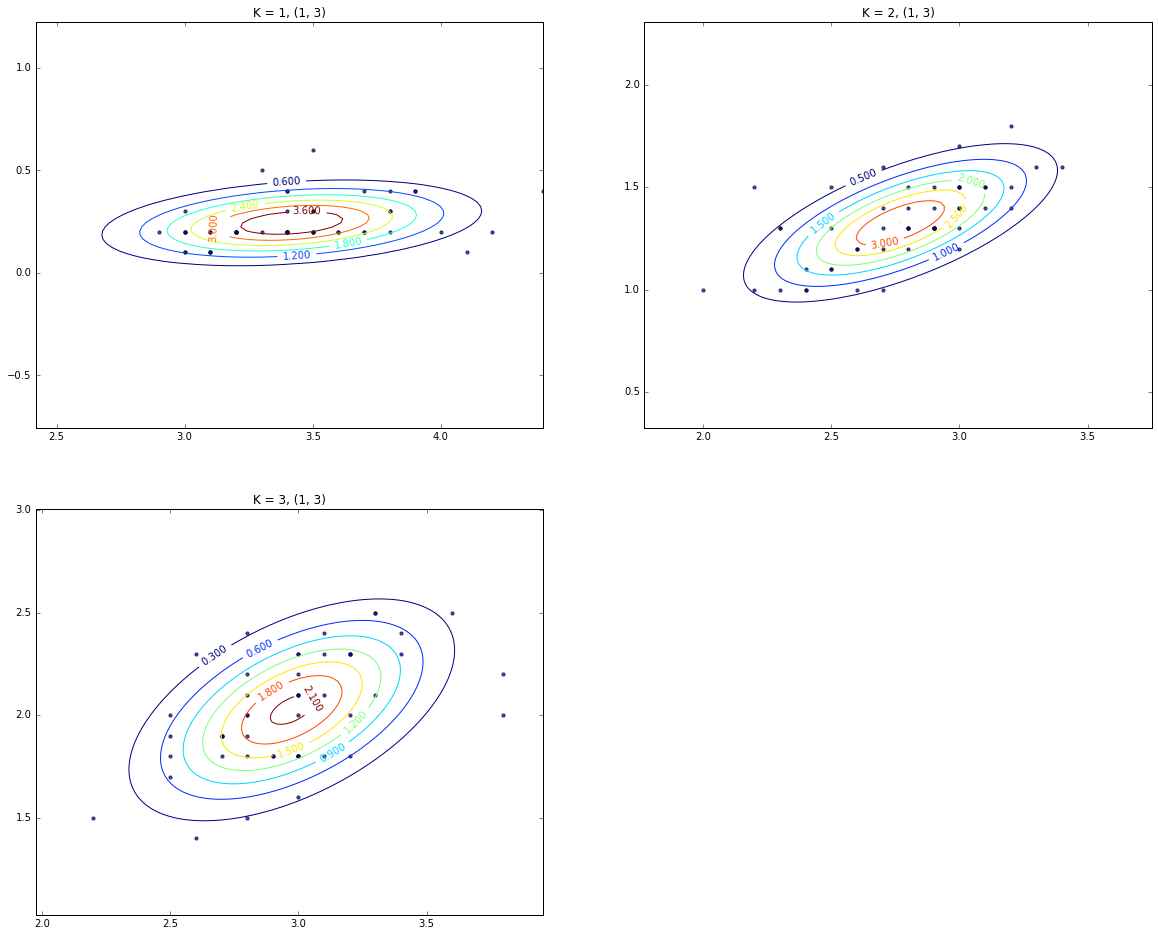

In [9]:
# построение графиков
plt.figure(figsize=(20, 16))

n = 1
m = 3

plt.subplot(2, 2, 1)
plot_pdf(mean, var, num_types, 0, n, m, width = 1)
plt.title('K = 1, (' + str(n) + ', ' + str(m) + ')')

plt.subplot(2, 2, 2)
plot_pdf(mean, var, num_types, 1, n, m, width = 1)
plt.title('K = 2, (' + str(n) + ', ' + str(m) + ')')

plt.subplot(2, 2, 3)
plot_pdf(mean, var, num_types, 2, n, m, width = 1)
plt.title('K = 3, (' + str(n) + ', ' + str(m) + ')')

plt.show()

### Графики для пары координат (2, 3)

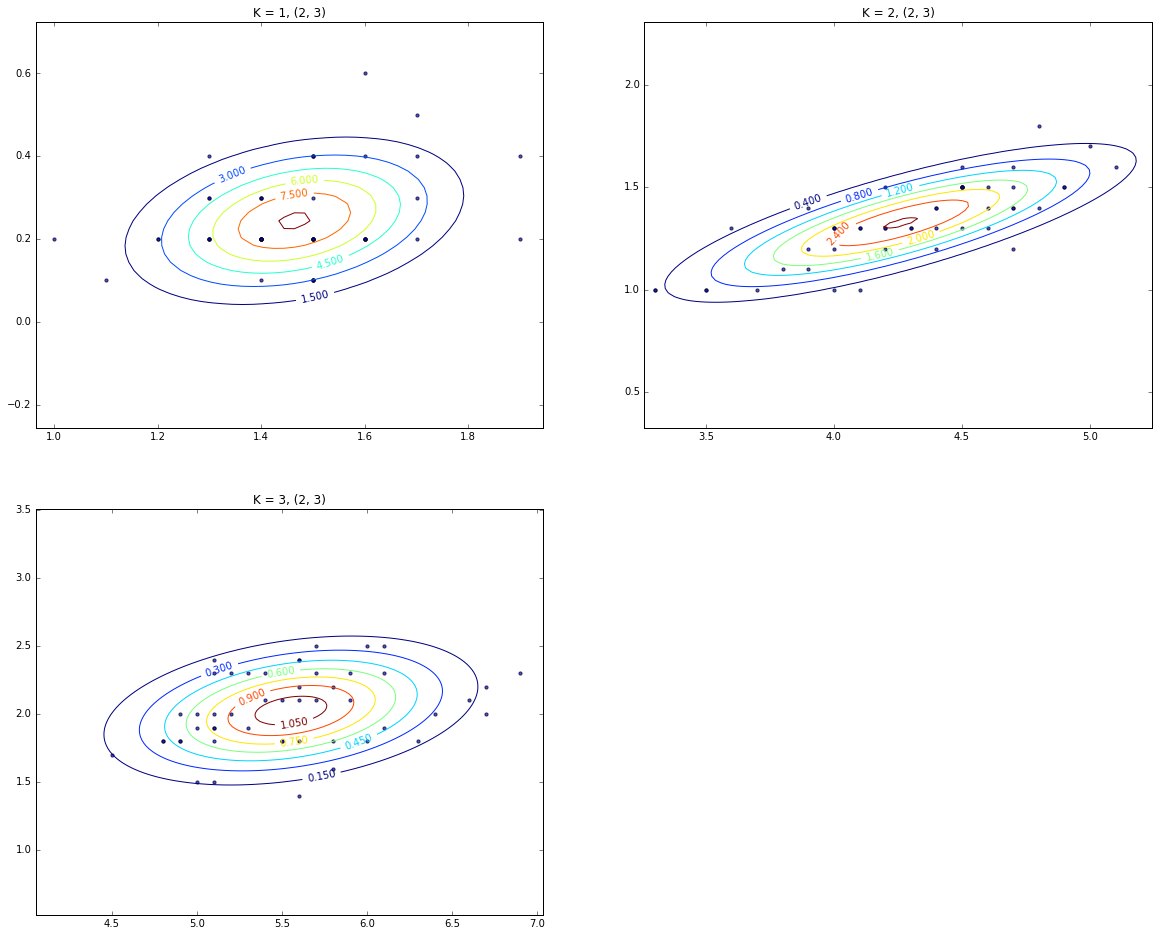

In [10]:
# построение графиков
plt.figure(figsize=(20, 16))

n = 2
m = 3

plt.subplot(2, 2, 1)
plot_pdf(mean, var, num_types, 0, n, m, width = 0.5)
plt.title('K = 1, (' + str(n) + ', ' + str(m) + ')')

plt.subplot(2, 2, 2)
plot_pdf(mean, var, num_types, 1, n, m, width = 1)
plt.title('K = 2, (' + str(n) + ', ' + str(m) + ')')

plt.subplot(2, 2, 3)
plot_pdf(mean, var, num_types, 2, n, m)
plt.title('K = 3, (' + str(n) + ', ' + str(m) + ')')

plt.show()